### 1. Import The Dependencies ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pickle

### 2. Data Loading and Understanding ###

In [3]:
# read the csv data file to pandas df
df = pd.read_csv("train - Copy.csv")

#### Initial Inspection ####

In [4]:
df.shape

(800, 22)

In [5]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
# convert age to integer
df['age'] = df['age'].astype(int)

In [9]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [10]:
for col in df.columns:
    numerical_features = ["ID","age","result"]
    if col not in numerical_features:
        print(col,df[col].unique())
        print("-"*30)

A1_Score [1 0]
------------------------------
A2_Score [0 1]
------------------------------
A3_Score [1 0]
------------------------------
A4_Score [0 1]
------------------------------
A5_Score [1 0]
------------------------------
A6_Score [0 1]
------------------------------
A7_Score [1 0]
------------------------------
A8_Score [0 1]
------------------------------
A9_Score [1 0]
------------------------------
A10_Score [1 0]
------------------------------
gender ['f' 'm']
------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
------------------------------
jaundice ['no' 'yes']
------------------------------
austim ['no' 'yes']
------------------------------
contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet

In [11]:
#dropping age_desc,ID columns
df = df.drop(columns =["ID","age_desc"])

In [12]:
df.shape

(800, 20)

In [13]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [14]:
# define the mapping dictionary for country name
mapping = {
    'Viet Nam':"Vietnam",
    'AmericanSamoa': "United States",
    'Hong Kong':"China"
}

# replace the value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [15]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [16]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

### 3. Exploratory Data Analysis (EDA) ###

In [17]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [18]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [19]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


#### Univariate Analysis

##### Numerical columns
 - age
 - result

In [20]:
# set the desired theme
sns.set_theme(style = "darkgrid")

27.96375 24.0


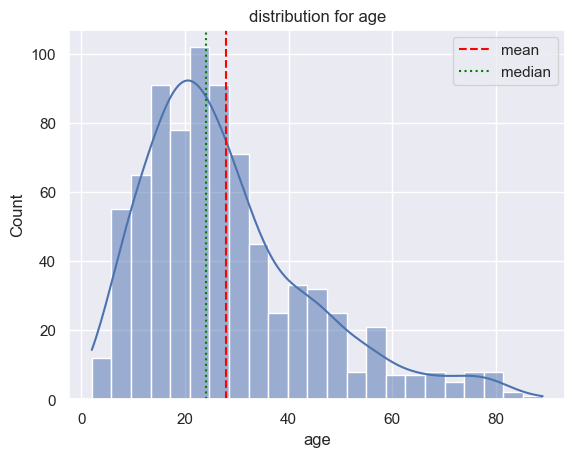

In [21]:
# Histogram for "age"
sns.histplot(df["age"],kde = True)
plt.title("distribution for age")

# calculate mean and media
age_mean = df["age"].mean()
age_median = df["age"].median()
print(age_mean,age_median)

# add vertical lines for mean ad median
plt.axvline(age_mean, color = "red", linestyle = "--", label = "mean")
plt.axvline(age_median, color = "green", linestyle = "dotted" , label = "median")

plt.legend()
plt.show()

8.537303106501248 9.605299308


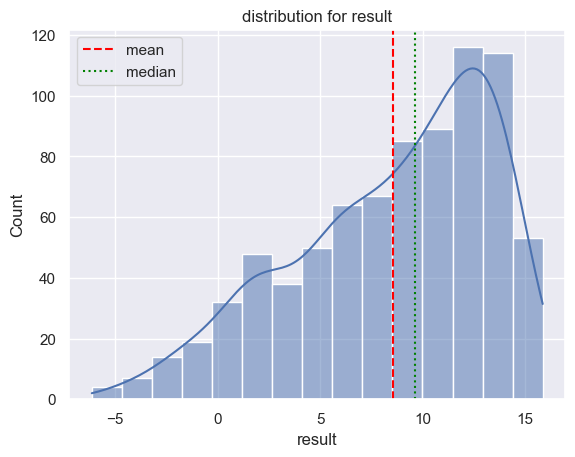

In [22]:
# Histogram for "result"
sns.histplot(df["result"],kde = True)
plt.title("distribution for result")

# calculate mean and media
result_mean = df["result"].mean()
result_median = df["result"].median()
print(result_mean,result_median)

# add vertical lines for mean and median
plt.axvline(result_mean, color = "red", linestyle = "--", label = "mean")
plt.axvline(result_median, color = "green", linestyle = "dotted" , label = "median")

plt.legend()
plt.show()

### Box plots for identifying outliers in the numerical columns

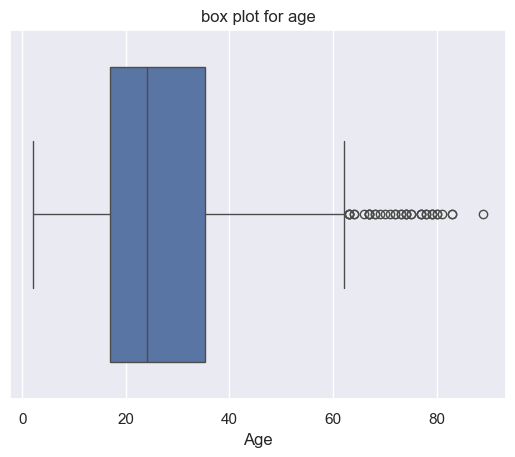

In [23]:
# Box plots for age
sns.boxplot(x=df["age"])
plt.title("box plot for age")
plt.xlabel("Age")
plt.show()

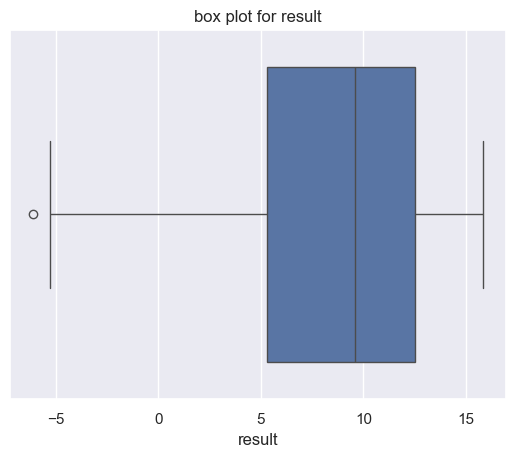

In [24]:
# Box plots for result
sns.boxplot(x=df["result"])
plt.title("box plot for result")
plt.xlabel("result")
plt.show()

In [25]:
# count the outliers using IQR method for AGE
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [26]:
len(age_outliers)

39

In [27]:
# count the outliers using IQR method for RESULT
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [28]:
len(result_outliers)

1

## Univariate analysis of categorical columns

In [29]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

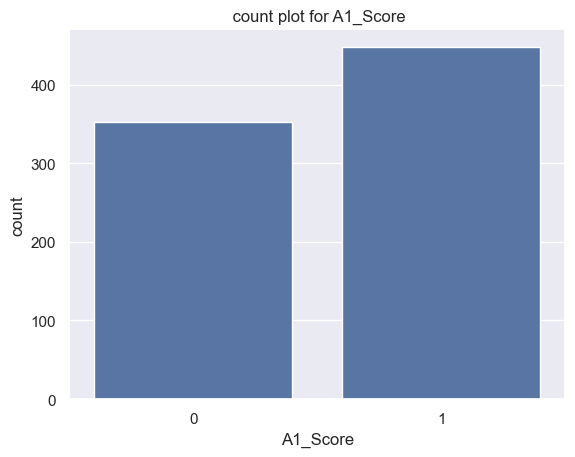

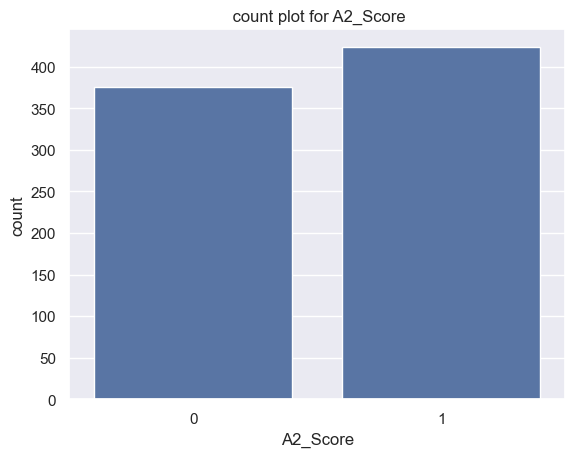

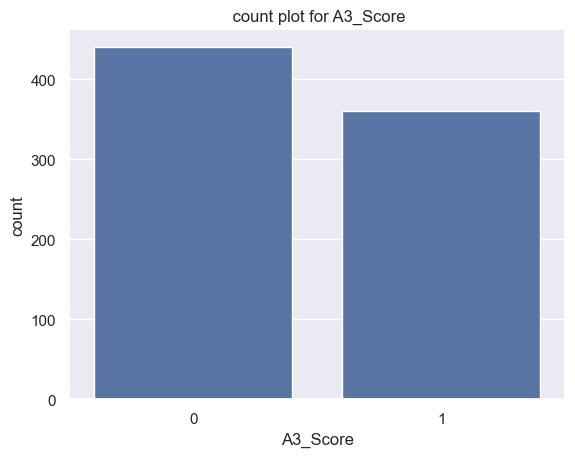

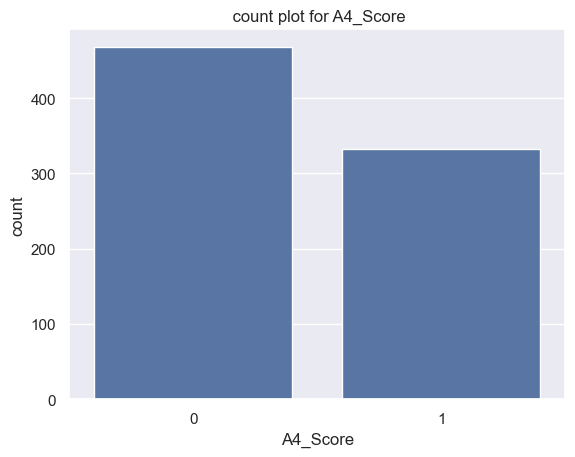

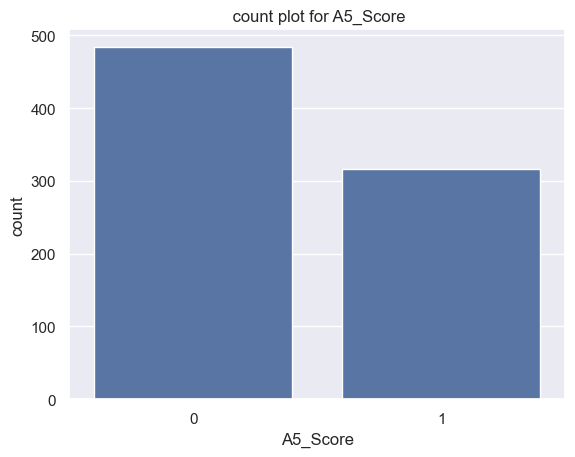

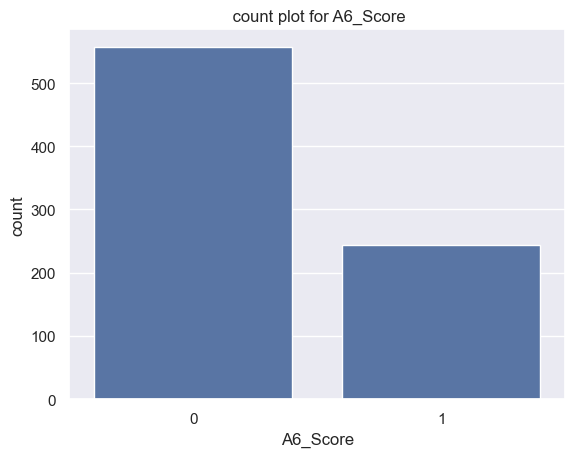

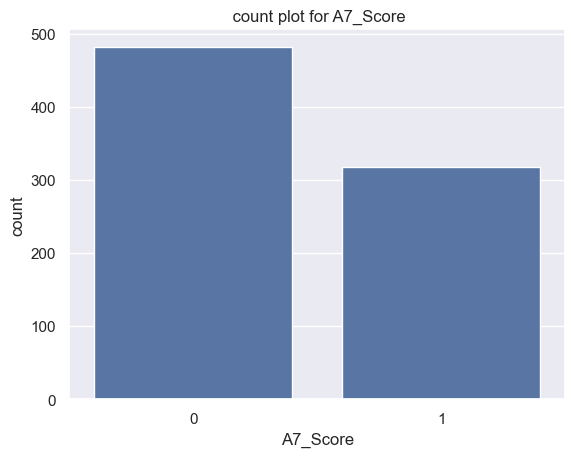

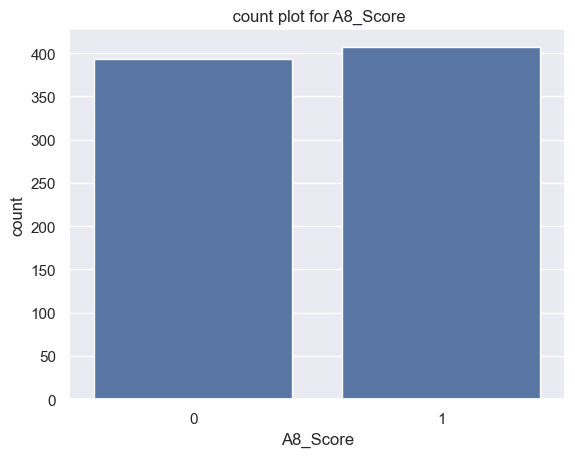

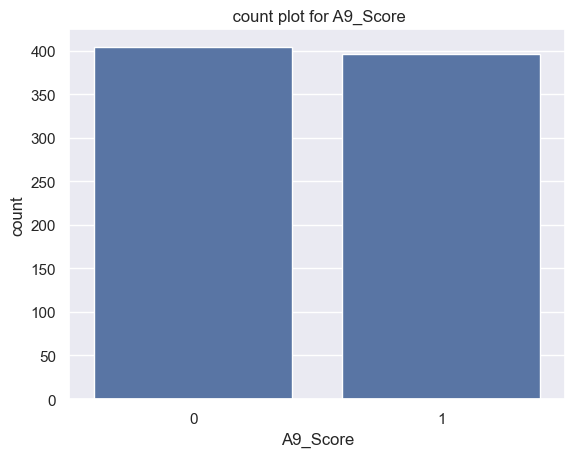

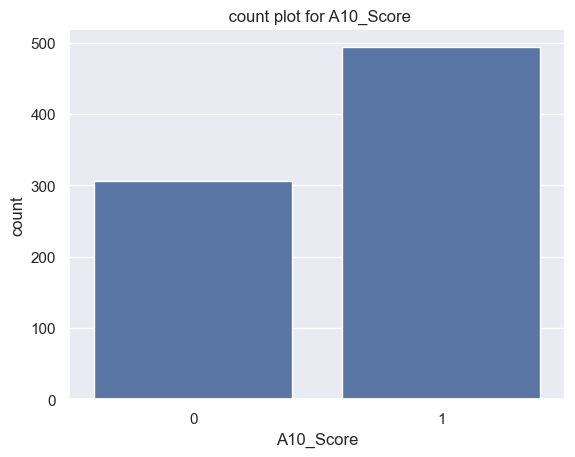

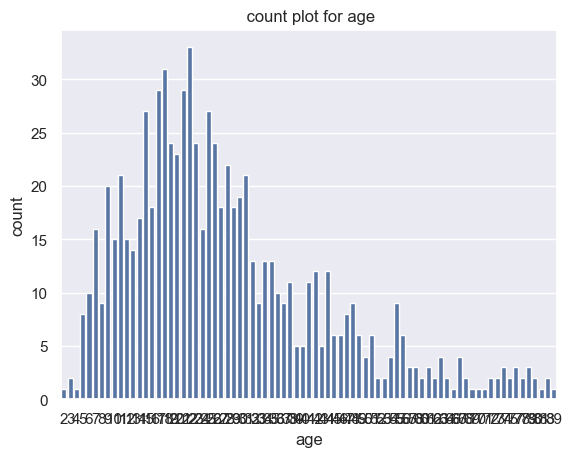

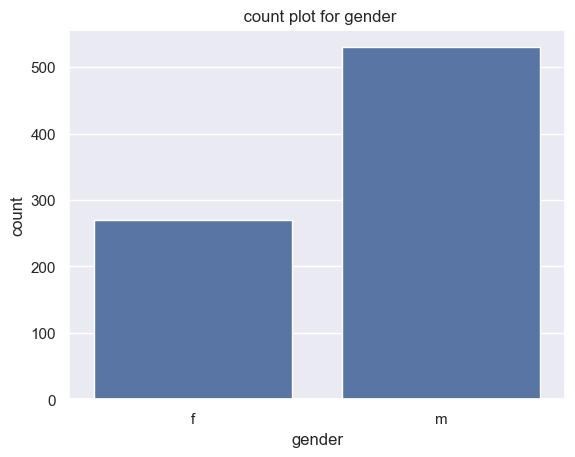

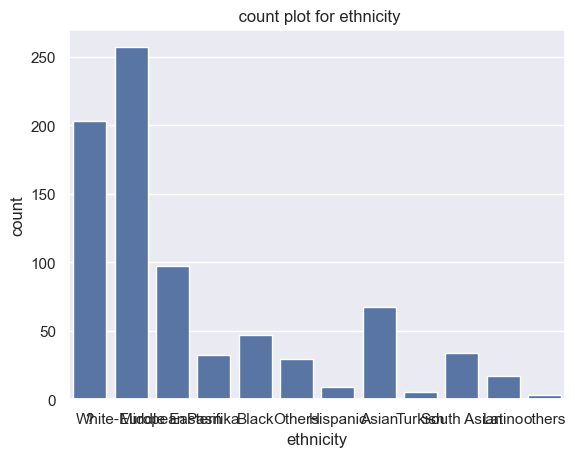

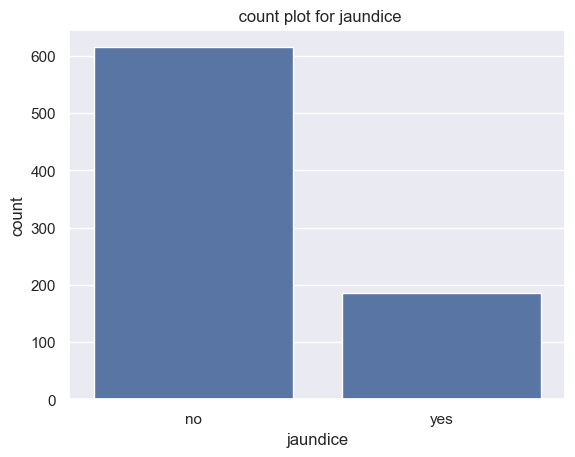

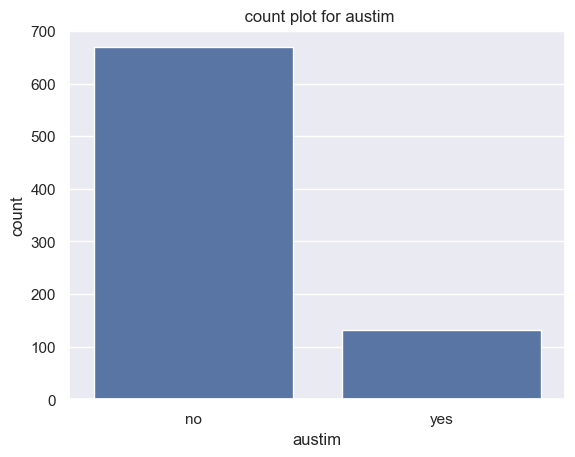

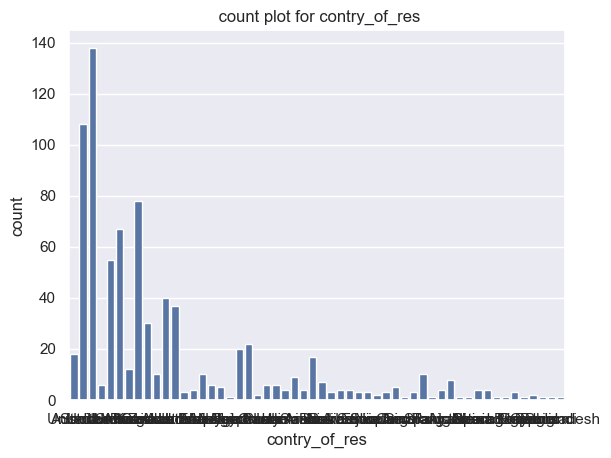

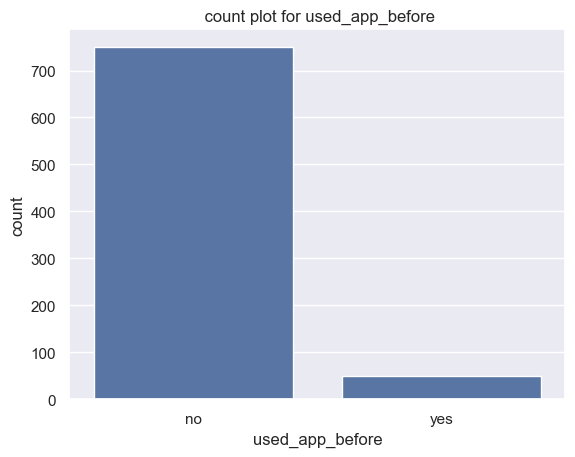

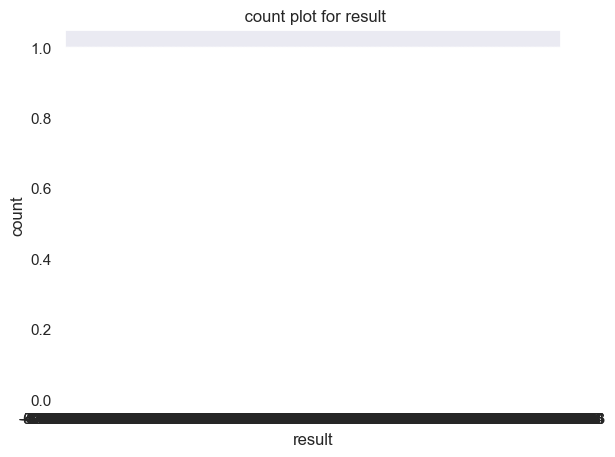

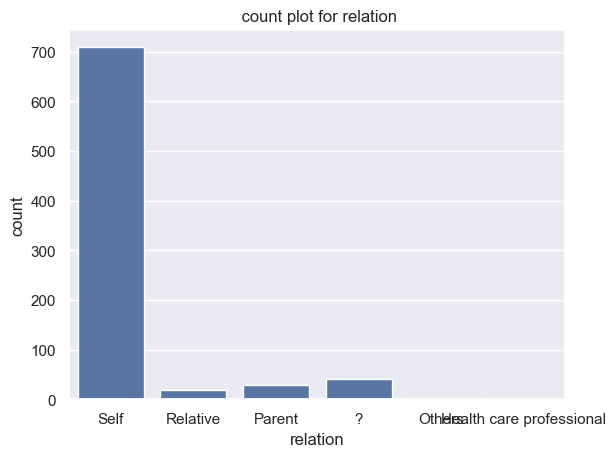

In [30]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before','result','relation',]

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f" count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

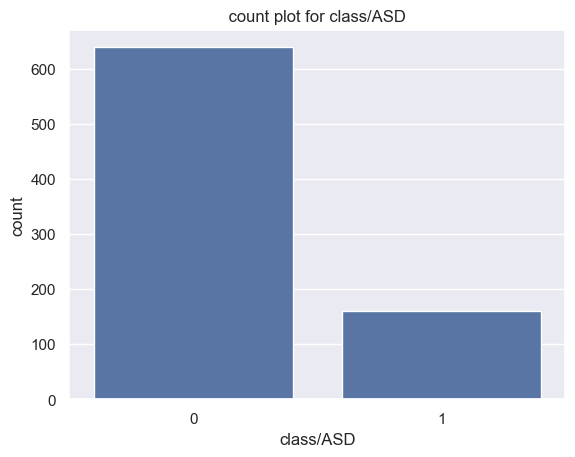

In [31]:
# countplot for target column {class/ASD}
sns.countplot(x=df["Class/ASD"])
plt.title(" count plot for class/ASD ")
plt.xlabel("class/ASD")
plt.ylabel("count")
plt.show()

## handling missing values in Ethinicity and relation columns

In [32]:
df["ethnicity"] = df["ethnicity"].replace({"?":"Others","others":"Others"})

In [33]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [34]:
df["relation"] = df["relation"].replace(
    {"?":"Others",
     "Relative":"Others",
     "Parent":"Others",
     "Health care professional":"Others",
     }
)

In [35]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [36]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [37]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


## Label Encoding

In [38]:
# idenyify columns with object datatype
object_columns = df.select_dtypes(include = ["object"]).columns

In [39]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [40]:
# initialise a dictionary to store the encoders
encoders = {}

# apply label encoding in store the columns
for col in object_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder  # saving the encoder for thsi column

# save the encoder as pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders, f)

In [41]:
print(encoders)

{'gender': LabelEncoder(), 'ethnicity': LabelEncoder(), 'jaundice': LabelEncoder(), 'austim': LabelEncoder(), 'contry_of_res': LabelEncoder(), 'used_app_before': LabelEncoder(), 'relation': LabelEncoder()}


In [42]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


## Bivariate Analysis

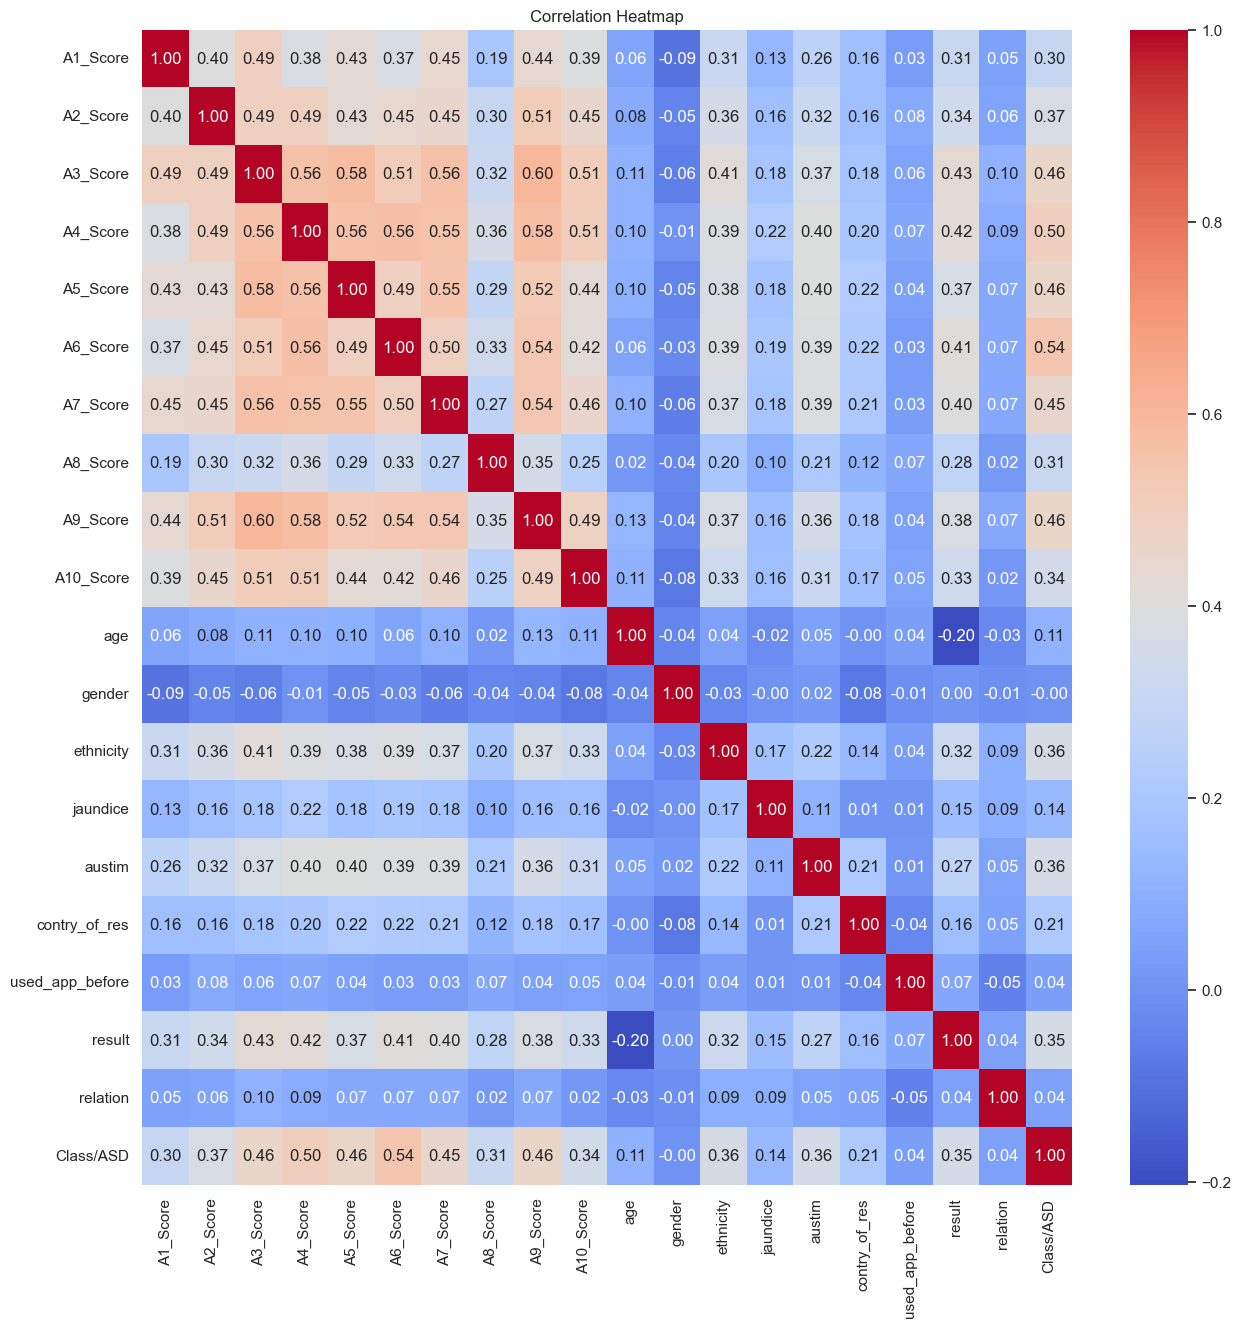

In [43]:
# correlation matrix
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot= True , cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

## Insights from EDA
- There is a class imbalance in the target column
- There is a class imbalance in Categorical Features
- There are few outliers in the numerical columns(age,results)
- We don't have any highly corelated column
- Performed label encoding and saved the encoders
   

# 4. Data Preprocessing

### Handling the outliers

In [44]:
# function to replace the outliers with median
def replace_outliers_with_median(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    # replace outliers with median

    df[column] = df[column].apply(lambda x:median if x < lower_bound or x > upper_bound else x)
    
    return df



In [45]:
# replace outliers in age column
df = replace_outliers_with_median(df,"age")

# replace outliers in result column
df = replace_outliers_with_median(df,'result')

In [46]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [47]:
df.shape

(800, 20)

## Train Test Split

In [48]:
x = df.drop(columns = ["Class/ASD"])
y = df["Class/ASD"]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [50]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [51]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

## SMOTE (Synthetic Minority Oversampling Technique)

In [52]:
smote = SMOTE(random_state = 42)

In [53]:
x_train_smote , y_train_smote = smote.fit_resample(x_train,y_train)

In [54]:
print(y_train_smote.shape)

(1030,)


In [55]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


# 5. Model Training

In [56]:
# list of classifiers
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state = 42),
    "Random forest" : RandomForestClassifier(random_state = 42),
    "XGBoost"       : XGBClassifier(random_state = 42)
}

In [57]:
# dictionary to store cross validation research
cv_scores = {}

# perform 5 fold cross validation
for model_name,model in models.items():
    print(f"training {model_name}  with default parameters...")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv = 5, scoring ="accuracy")
    cv_scores[model_name] = scores
    print(f" {model_name}, Cross validation accuracy: {np.mean(scores):.2f} ")
    print("-"*50)


training Decision Tree  with default parameters...
 Decision Tree, Cross validation accuracy: 0.86 
--------------------------------------------------
training Random forest  with default parameters...
 Random forest, Cross validation accuracy: 0.92 
--------------------------------------------------
training XGBoost  with default parameters...
 XGBoost, Cross validation accuracy: 0.90 
--------------------------------------------------


In [58]:
cv_scores


{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

## 6.Model Selection and hyper parameter tuning

In [61]:
# initialising models
decision_tree = DecisionTreeClassifier(random_state = 42)
random_forest = RandomForestClassifier(random_state = 42)
xgboost_classifier = XGBClassifier(random_state = 42)

In [60]:
# Hyperparameter grids for RandomizedSearchCV
param_grid_dt = {
    "criterion":["gini","entropy"],
    "max_depth":[None, 10, 20, 30, 50, 70],
    "min_samples_split": [2,5,10],
    "min_samples_leaf":[1,2,4]
}


param_grid_rf = {
    "n_estimators": [50,100,200,500],
    "max_depth":[None, 10, 20, 30, 50, 70],
    "min_samples_split": [2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

param_grid_xgb = {
    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
    
}



In [63]:
# hyperparamter tuning for 3 tree based models
# the below steps can be automated by for loop or by using a pipeline
# perform randomized search CV for each model

random_search_dt = RandomizedSearchCV(estimator = decision_tree, param_distributions=param_grid_dt, n_iter=20, cv =5, scoring = "accuracy",random_state=42)
random_search_rf = RandomizedSearchCV(estimator = random_forest, param_distributions=param_grid_rf, n_iter=20, cv =5, scoring = "accuracy",random_state=42)
random_search_xgb = RandomizedSearchCV(estimator = xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv =5, scoring = "accuracy",random_state=42)




In [64]:
random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [69]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)
0.8699029126213592
RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)
0.9174757281553398


In [68]:
#get the model with best score
best_model = None
best_score = 0


if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [70]:
print(f"best model : {best_model}")
print(f"best cross validation accuracy: {best_score:.2f}")

best model : RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)
best cross validation accuracy: 0.92


In [71]:
# save the best model
with open("best_model.pkl", "wb") as  f:
    pickle.dump(best_model,f)

# 7. Evaluation

In [73]:
y_test_pred = best_model.predict(x_test)
print("accuracy_score", accuracy_score(y_test,y_test_pred))
print("confusion matrix",confusion_matrix(y_test,y_test_pred))
print("classification report",classification_report(y_test,y_test_pred))

accuracy_score 0.8375
confusion matrix [[108  16]
 [ 10  26]]
classification report               precision    recall  f1-score   support

           0       0.92      0.87      0.89       124
           1       0.62      0.72      0.67        36

    accuracy                           0.84       160
   macro avg       0.77      0.80      0.78       160
weighted avg       0.85      0.84      0.84       160

